In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#Data load
df = pd.read_csv("olist_orders_dataset.csv")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
#Data understanding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [4]:
#important columns selected
df = df[[
    "order_id",
    "order_status",
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]]

In [5]:
#Date Format Fix
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

In [6]:
#clean Data
df = df.dropna(subset=["order_delivered_customer_date"])

In [7]:
df = df.copy()

In [8]:
#delivery time calculation
df.loc[:, "actual_delivery_days"] = (
    df["order_delivered_customer_date"] - 
    df["order_purchase_timestamp"]
).dt.days


In [9]:
#Estimated delivery
df["estimated_delivery_days"] = (
   df["order_estimated_delivery_date"] - 
    df["order_purchase_timestamp"]
).dt.days

In [10]:
#Delay Calculation
# Positive = Late delivery
# Negative = Early delivery
df["delivery_delay"] = (
    df["actual_delivery_days"] - df["estimated_delivery_days"]
)

In [11]:
#delay orders
#late deliveries
late_orders = df[df["delivery_delay"] > 0 ]

# percentage of late orders
late_percentage = (len(late_orders)/ len(df)) * 100
late_percentage

7.574940917948505

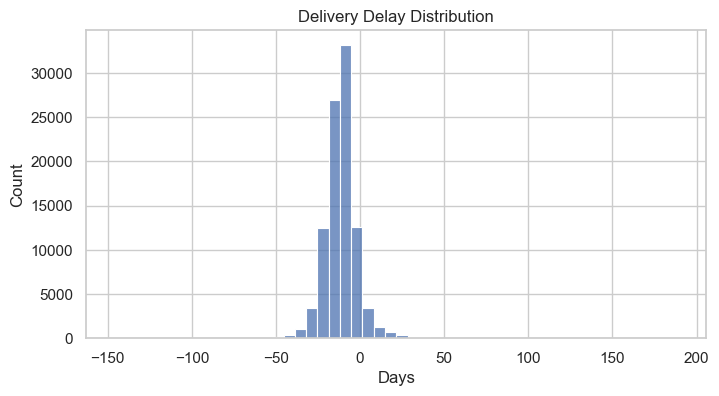

In [12]:
#visualisation
plt.figure(figsize=(8,4))
sns.histplot(df["delivery_delay"],bins= 50)
plt.title("Delivery Delay Distribution")
plt.xlabel("Days")
plt.show()

In [13]:
#Status Wise Analysis
df["order_status"].value_counts()

order_status
delivered    96470
canceled         6
Name: count, dtype: int64

In [14]:
#Final business conclusion
df.groupby("order_status")["delivery_delay"].mean()

order_status
canceled    -27.333333
delivered   -11.279144
Name: delivery_delay, dtype: float64